In [13]:
%matplotlib inline
#Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group


#own modules
from sigmoid import g,dg,ddg,dddg, plot_sigmoid
import myplots
from tensor_util import *
from main_function import f, df, ddf, dddf

In [14]:
def uniformSphere(d, m_x):
    x = np.random.normal(size=(m_x,d))
    for i in range(m_x):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x

def perm_matrix(m):
    P = np.identity(m)
    P = np.random.permutation(P)#permutes only the rows
    return P, np.linalg.inv(P)
def decomp_svd_dd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    ddf_values = ddf(X,A,B)
    unfolds = [np.reshape(dd, (m**2,)) for dd in ddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**2)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return ddf_values, U, D
        
    
def decomp_svd_ddd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    dddf_values = dddf(X,A,B)
    unfolds = [np.reshape(dd, (m**3,)) for dd in dddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**3)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return dddf_values, U, D

In [15]:
#Setting parameters, and creating data
m = 2
m_1 = 1
m_x = 100
X = uniformSphere(m, m_x)
A = ortho_group.rvs(dim = m)# m orthogonal vectors with dim m, a_1, ..., a_m
A = np.transpose(A)
B = ortho_group.rvs(dim = m)[:m_1]#m_1 orthogonal vectors with dimension m b_1, ..., b_m_1
B = np.transpose(B)

SVD for unfolding of third derivative:
Ratio singular values: (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.000000

Minimal distance of a_i*a_i to the first m+m_1 left singular vectors:
dist(U[:, :3], a_0*a_0) = 0.050386
dist(U[:, :3], a_1*a_1) = 0.063982


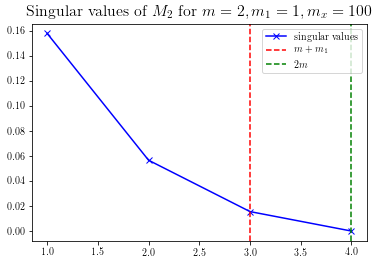

In [16]:
ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
myplots.plot_singular_values(D_dd, m, m_1, m_x, der = 2, filename="sigmoid2nd.pdf")
k = m+m_1

print("SVD for unfolding of third derivative:")
ratio_sv = np.sum(D_dd[:k])/np.sum(D_dd)
print("Ratio singular values: (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(k, ratio_sv))

print("\nMinimal distance of a_i*a_i to the first m+m_1 left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}) = {:.6f}".format(k,i,i,np.min(tensor_distance_to_columns(A[:,i], U_dd, k, mode=2))))



In [20]:
U_ddd.shape, D_ddd.shape

((8, 8), (8,))


SVD for unfolding of third derivative:
Ratio singular values:(sv_1+ ...+ sv_3)/(sum_i sv_i)=0.973649

Minimal distance of a_i*a_i*a_i to the first m+m_1 left singular vectors:
dist(U[:, :3], a_0*a_0*a_0) = 0.304820
dist(U[:, :3], a_1*a_1*a_1) = 0.303725


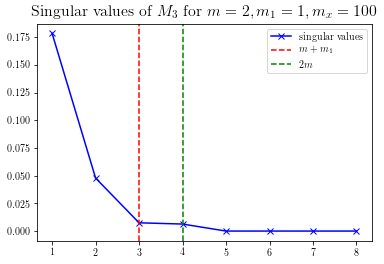

In [19]:
dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B, randomize=False)
myplots.plot_singular_values(D_ddd, m,m_1,m_x, der = 3, filename="sigmoid3rd.pdf")
k = m+m_1

print("\nSVD for unfolding of third derivative:")
ratio_sv = np.sum(D_ddd[:k])/np.sum(D_ddd)
print("Ratio singular values:(sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(k, ratio_sv))

print("\nMinimal distance of a_i*a_i*a_i to the first m+m_1 left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {:.6f}".format(k,i,i,i,np.min(tensor_distance_to_columns(A[:,i], U_ddd, k, mode=3))))



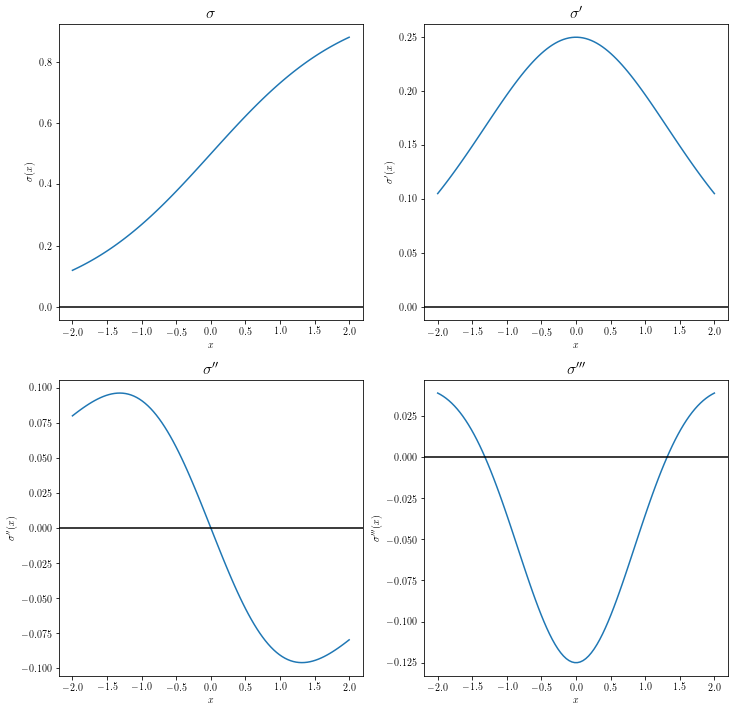

In [6]:
plot_sigmoid(filename = "sigmoid.pdf")

In [7]:
m = [2**k for k in range(1,6)]
m_x = [8**k for k in range(1, 5)]
m_1 = 1
ratio_dd = np.zeros((5,4))
ratio_ddd = np.zeros((5,4))
average_dists_dd = np.zeros((5,4))
average_dists_ddd = np.zeros((5,4))

for i in range(5):
    A = ortho_group.rvs(dim = m[i])
    A = np.transpose(A)
    B = ortho_group.rvs(dim = m[i])[:m_1]
    B = np.transpose(B)
    for j in range(i, 4):
        print("\n*****************************************************")
        print("Running for m={},m_1={}, m_x={}:\n".format(m[i],m_1,m_x[j]))
        X = uniformSphere(m[i], m_x[j])
        print("\nSVD for unfolding of second derivative:")
        ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
        k = m[i]+m_1

        ratio_sv = np.sum(D_dd[:k])/np.sum(D_dd)
        ratio_dd[i,j] = ratio_sv
        print("Ratio sv: (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(k, ratio_sv))
        
        dists = []
        for ind in range(m[i]):
            d = np.min(tensor_distance_to_columns(A[:,ind], U_dd, k, mode=2))
            dists.append(d)
            print("dist(U[:, :{}], a_{}*a_{}) = {:.6f}".format(k,ind,ind,d))
        avg = np.mean(dists)
        average_dists_dd[i,j]=avg
        print("Average dist: {:.6f}".format(avg))
        

        
        print("\nSVD for unfolding of third derivative:")
        dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B,randomize=True)
        k = m[i]+m_1
        
        ratio_sv = np.sum(D_ddd[:k])/np.sum(D_ddd)
        ratio_ddd[i,j] = ratio_sv
        print("Ratio sv: (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(k, ratio_sv))
        
        dists = []
        for ind in range(m[i]):
            d = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, k, mode=3))
            dists.append(d)
            print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {:.6f}".format(k,ind,ind,ind,d))
            

        avg = np.mean(dists)
        average_dists_ddd[i,j]=avg
        print("Average dist: {:.6f}".format(avg))


*****************************************************
Running for m=2,m_1=1, m_x=8:


SVD for unfolding of second derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.000000

dist(U[:, :3], a_0*a_0) = 0.017059
dist(U[:, :3], a_1*a_1) = 0.055082
Average dist: 0.036071

SVD for unfolding of third derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=0.982909

dist(U[:, :3], a_0*a_0*a_0) = 0.197145
dist(U[:, :3], a_1*a_1*a_1) = 0.211742
Average dist: 0.204443

*****************************************************
Running for m=2,m_1=1, m_x=64:


SVD for unfolding of second derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.000000

dist(U[:, :3], a_0*a_0) = 0.051135
dist(U[:, :3], a_1*a_1) = 0.085367
Average dist: 0.068251

SVD for unfolding of third derivative:
Ratio sv: (sv_1+ ...+ sv_3)/(sum_i sv_i)=0.978821

dist(U[:, :3], a_0*a_0*a_0) = 0.187512
dist(U[:, :3], a_1*a_1*a_1) = 0.191689
Average dist: 0.189600

*****************************************************
Running for m=2,m_

In [8]:
ratio_dd

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.99715599,  0.99674088,  0.99680679],
       [ 0.        ,  0.        ,  0.98301397,  0.98273052],
       [ 0.        ,  0.        ,  0.        ,  0.98885728],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [9]:
ratio_ddd

array([[ 0.98290947,  0.97882118,  0.97786762,  0.97720486],
       [ 0.        ,  0.98889591,  0.98801869,  0.98788905],
       [ 0.        ,  0.        ,  0.93273767,  0.93140626],
       [ 0.        ,  0.        ,  0.        ,  0.9610681 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
average_dists_dd

array([[ 0.0360707 ,  0.06825134,  0.03417133,  0.03223336],
       [ 0.        ,  0.13649735,  0.28338603,  0.17265711],
       [ 0.        ,  0.        ,  0.28136451,  0.29246638],
       [ 0.        ,  0.        ,  0.        ,  0.36126767],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [11]:
average_dists_ddd

array([[ 0.20444328,  0.18960021,  0.2242384 ,  0.22461482],
       [ 0.        ,  0.52636626,  0.51731043,  0.51867446],
       [ 0.        ,  0.        ,  0.7858592 ,  0.76994522],
       [ 0.        ,  0.        ,  0.        ,  0.89677674],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [12]:
ratio_dd

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.99715599,  0.99674088,  0.99680679],
       [ 0.        ,  0.        ,  0.98301397,  0.98273052],
       [ 0.        ,  0.        ,  0.        ,  0.98885728],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])